<a href="https://colab.research.google.com/github/karthika2495/Client-query-management/blob/main/Nutriclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_score,recall_score,f1_score


In [3]:
df = pd.read_csv("/content/synthetic_food_dataset_imbalanced.csv")
df


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta


#Data Cleaning

In [4]:
Nutri_df = df
Nutri_df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [5]:
Nutri_df.shape

(31700, 16)

In [6]:
Nutri_df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [7]:
Nutri_df.describe(include=object)

,Meal_Type,Preparation_Method,Food_Name
count,31700,31700,31700
unique,4,4,10
top,snack,baked,Pizza
freq,8001,8048,6000


In [8]:
Nutri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [9]:
Nutri_df.isnull().sum()

,0
Calories,375
Protein,375
Fat,375
Carbs,375
Sugar,375
Fiber,375
Sodium,375
Cholesterol,375
Glycemic_Index,375
Water_Content,375


In [10]:
Nutri_df.duplicated().sum()

np.int64(313)

In [11]:
Nutri_df[Nutri_df.duplicated()]


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lunch,baked,False,False,Pizza
2161,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.1264,251.837472,554.719629,lunch,grilled,False,True,Steak
2905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lunch,baked,False,False,Pizza
2915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snack,baked,False,False,Pizza
3366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,breakfast,fried,False,True,Sushi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dinner,grilled,False,False,Burger
31388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dinner,grilled,False,False,Pasta
31483,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.1264,251.837472,554.719629,breakfast,raw,False,False,Burger
31504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snack,grilled,False,True,Ice Cream


In [12]:
Nutri_df = Nutri_df.drop_duplicates()


In [13]:
Nutri_df.duplicated().sum()

np.int64(0)

In [14]:
Nutri_df["Calories"].value_counts(dropna=False)

,count
Calories,
NaN,127
1289.956763,84
283.392200,1
349.028904,1
282.555634,1
...,...
209.986071,1
151.198190,1
317.026695,1


<Axes: ylabel='Frequency'>

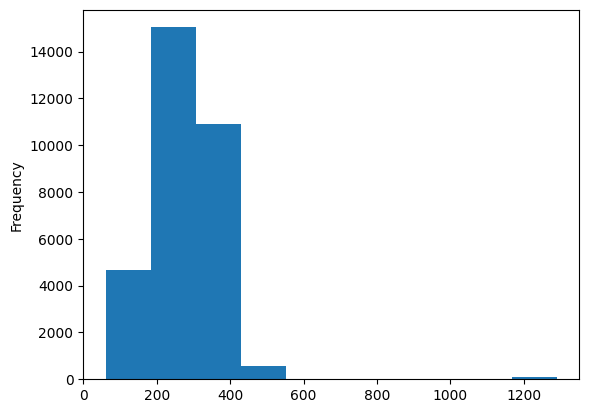

In [15]:
Nutri_df["Calories"].plot(kind='hist')

<Axes: >

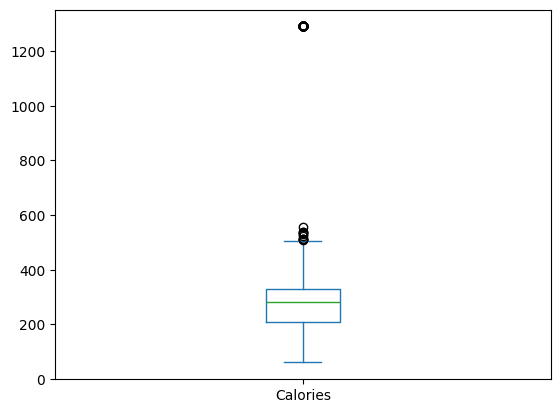

In [16]:
Nutri_df["Calories"].plot(kind='box')

In [17]:
Nutri_df = Nutri_df.dropna(subset=["Calories"])
Nutri_df = Nutri_df[~Nutri_df["Calories"].between(1289.95, 1289.96)]


In [18]:
Nutri_df["Calories"].value_counts(dropna=False)

,count
Calories,
203.952826,1
290.463673,1
212.626748,1
330.695408,1
198.070798,1
...,...
348.281528,1
286.411487,1
295.508509,1


In [19]:
Nutri_df["Protein"].value_counts(dropna=False)

,count
Protein,
0.000000,16
6.060402,1
13.721624,1
4.109302,1
10.537101,1
...,...
8.090834,1
4.793784,1
5.311883,1


In [20]:
Nutri_df = Nutri_df[Nutri_df["Protein"] > 0]


In [21]:
Nutri_df["Protein"].value_counts(dropna=False)

,count
Protein,
5.322650,1
14.340084,1
4.080908,1
14.326708,1
9.452445,1
...,...
17.155093,1
14.537850,1
10.655712,1


In [22]:
Nutri_df["Carbs"].value_counts(dropna=False)

,count
Carbs,
0.000000,1019
31.006289,1
39.467313,1
37.570574,1
29.761439,1
...,...
28.105501,1
33.893176,1
39.112949,1


<Axes: ylabel='Frequency'>

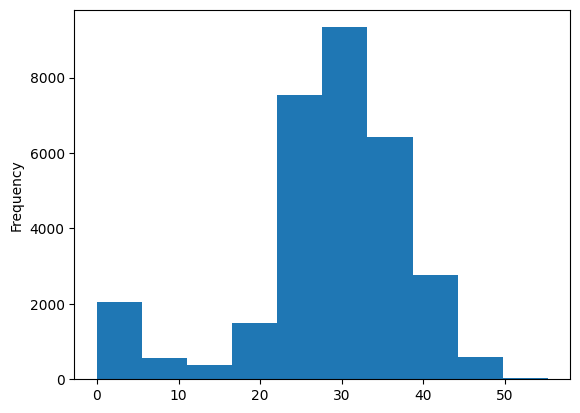

In [23]:
Nutri_df["Carbs"].plot(kind='hist')

In [24]:
Nutri_df = Nutri_df[Nutri_df["Carbs"] > 0]

In [25]:
Nutri_df["Carbs"].value_counts(dropna=False)

,count
Carbs,
26.686660,1
35.266644,1
23.218957,1
29.479164,1
32.097878,1
...,...
25.936921,1
28.196129,1
29.546981,1


In [26]:
Nutri_df["Serving_Size"].value_counts(dropna=False)

,count
Serving_Size,
113.912626,1
197.570043,1
103.833510,1
198.989367,1
135.714202,1
...,...
82.361289,1
158.822865,1
182.320914,1


In [27]:
Nutri_df.isnull().sum()

,0
Calories,0
Protein,0
Fat,0
Carbs,0
Sugar,0
Fiber,0
Sodium,0
Cholesterol,0
Glycemic_Index,0
Water_Content,0


#EDA

In [28]:
from scipy.stats import f_oneway, ttest_ind, chi2_contingency

In [29]:
nutrients = ["Calories","Protein","Fat","Carbs","Sugar","Fiber",
             "Sodium","Cholesterol","Glycemic_Index","Water_Content","Serving_Size"]

In [30]:
#Nutrients vs food_Name
anova_results = {}

for nutrient in nutrients:
    groups = [
        group[nutrient].values
        for name, group in Nutri_df.groupby("Food_Name")
    ]

    F, P = f_oneway(*groups)
    anova_results[nutrient] = P



In [31]:
anova_df = pd.DataFrame.from_dict(
    anova_results,
    orient="index",
    columns=["p_value"]
)

anova_df["Significant"] = anova_df["p_value"] < 0.05

anova_df = anova_df.sort_values("p_value")
print(anova_df)

                p_value  Significant
Calories            0.0         True
Protein             0.0         True
Fat                 0.0         True
Carbs               0.0         True
Sugar               0.0         True
Fiber               0.0         True
Sodium              0.0         True
Cholesterol         0.0         True
Glycemic_Index      0.0         True
Water_Content       0.0         True
Serving_Size        0.0         True


In [32]:
#Nutrients Between 2 Groups (e.g., Is_Vegan)
ttest_results = {}
for nutirent in nutrients:
  veg = Nutri_df[Nutri_df["Is_Vegan"]==1][nutrient]
  nonveg = Nutri_df[Nutri_df["Is_Vegan"]==0][nutrient]
  t_stat,p_val = ttest_ind(veg,nonveg,equal_var=False)
  ttest_results[nutrient] = p_val

ttest_df = pd.DataFrame.from_dict(ttest_results, orient='index', columns=["p-value"])
ttest_df["Significant"] = ttest_df["p-value"] < 0.05
print(ttest_df.sort_values("p-value"))

              p-value  Significant
Serving_Size      0.0         True


In [33]:
#Meal_type vs preparation_method

cont_table = pd.crosstab(Nutri_df["Meal_Type"], Nutri_df["Preparation_Method"])
chi2, p, dof, ex = chi2_contingency(cont_table)
print("Chi2:", chi2, "p-value:", p)
if p < 0.05:
    print("Significant association between Meal_Type and Preparation_Method")
else:
    print("No significant association")

Chi2: 2.5638786258195534 p-value: 0.9791159223495591
No significant association


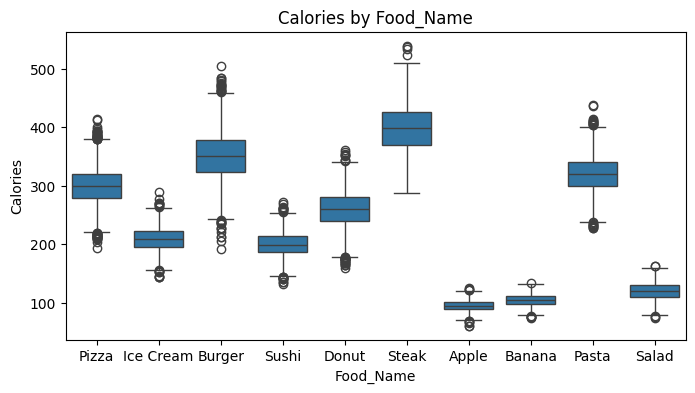

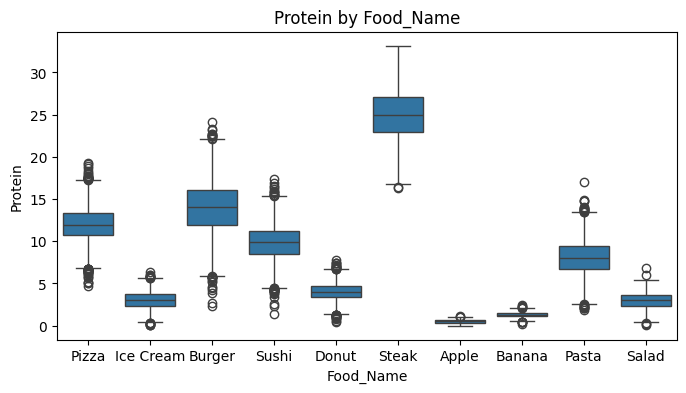

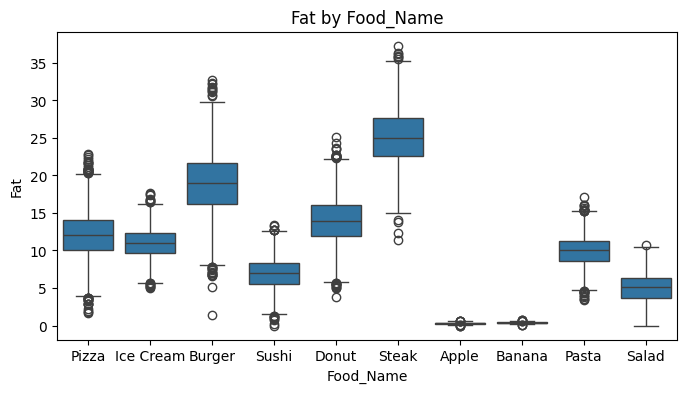

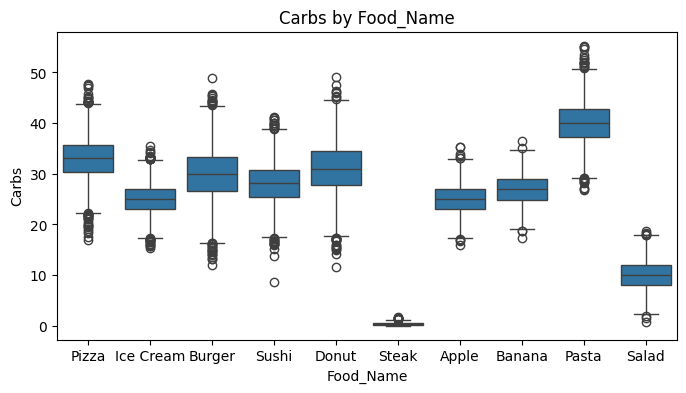

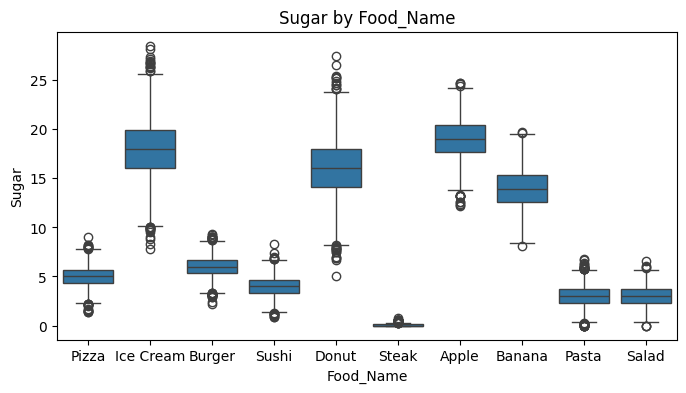

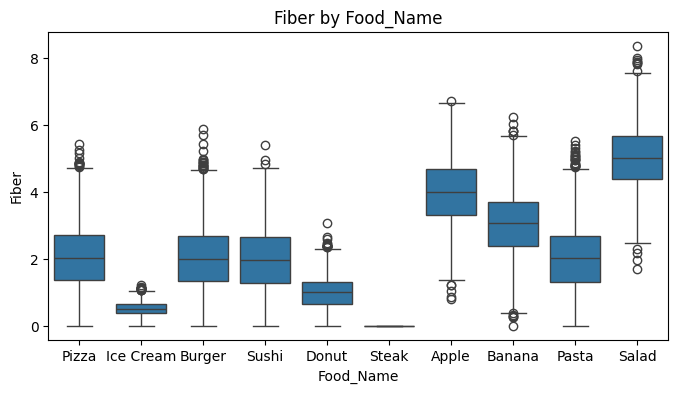

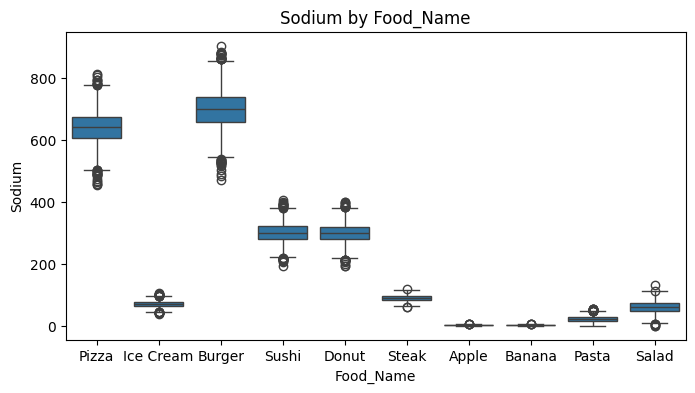

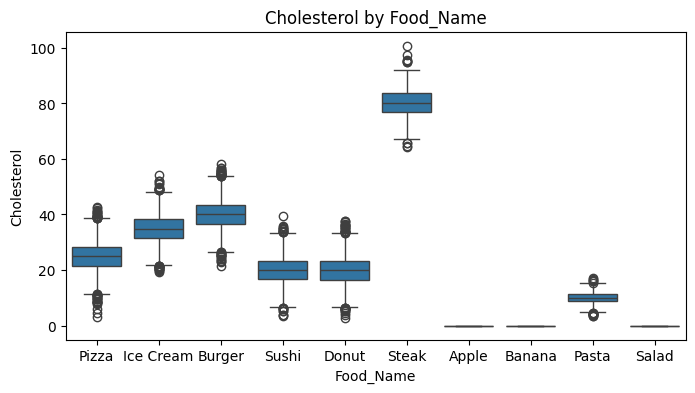

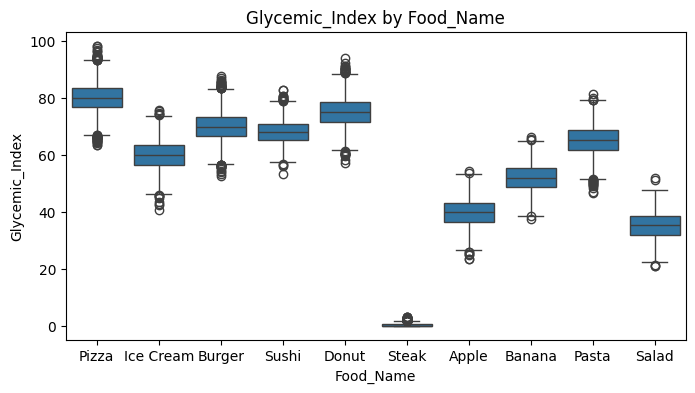

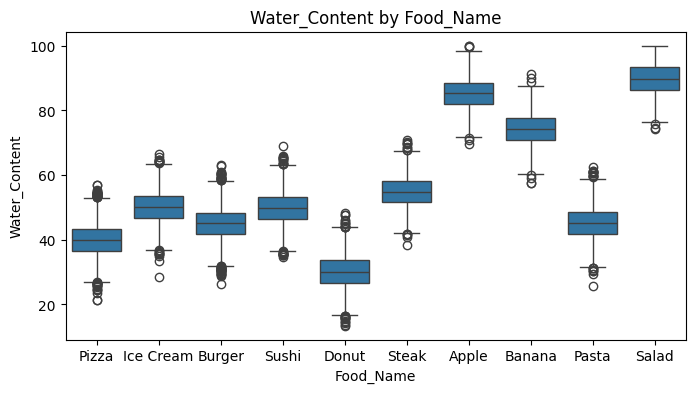

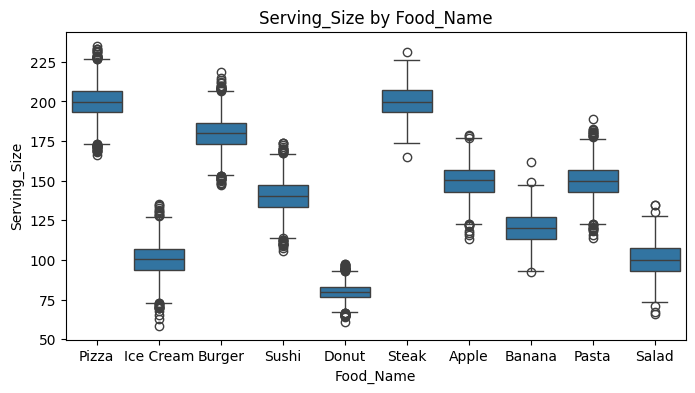

In [34]:
for nutrient in nutrients:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Food_Name", y=nutrient, data=Nutri_df)
    plt.title(f"{nutrient} by Food_Name")
    plt.show()



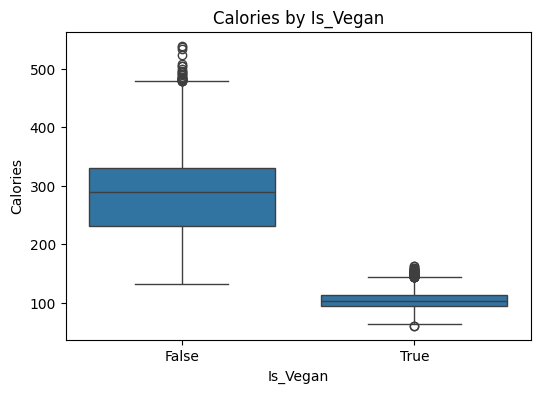

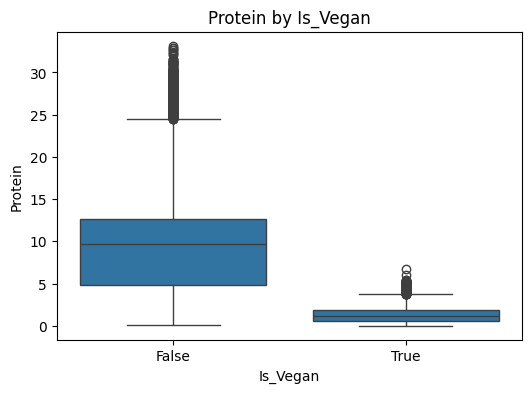

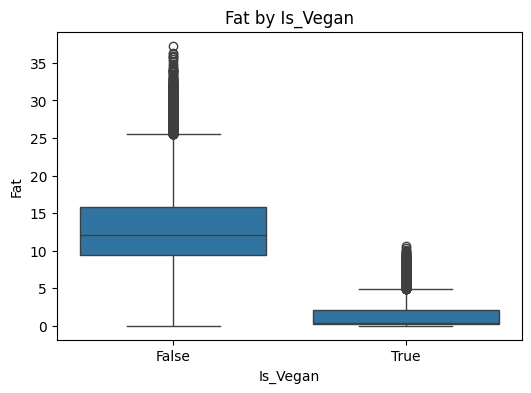

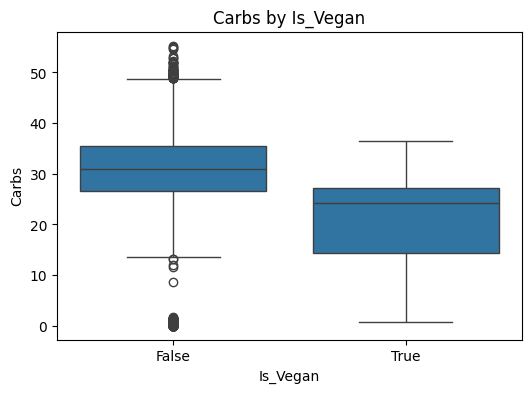

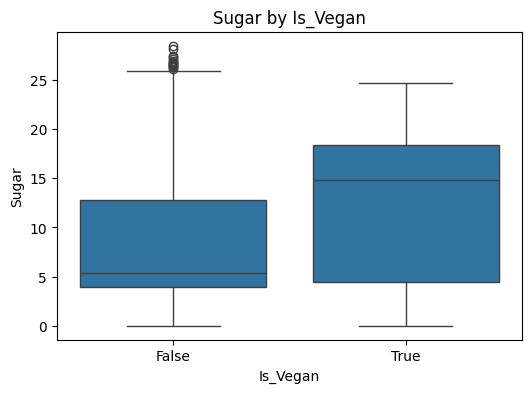

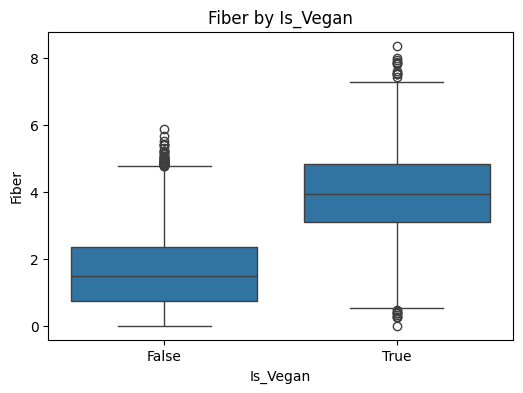

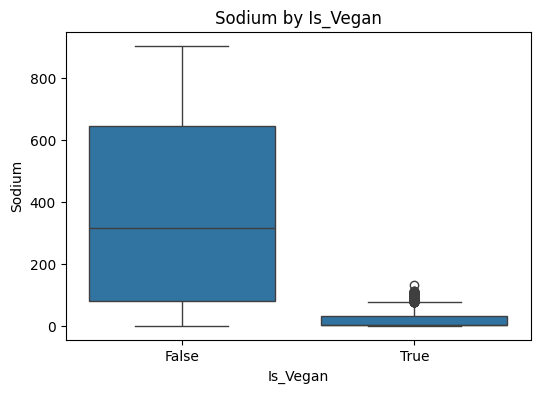

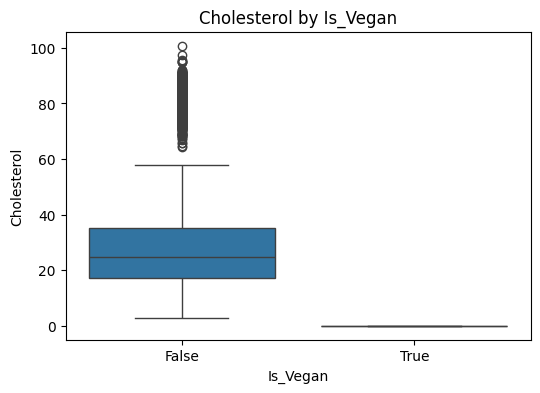

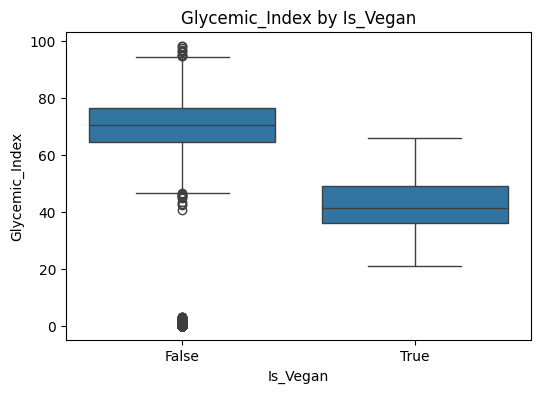

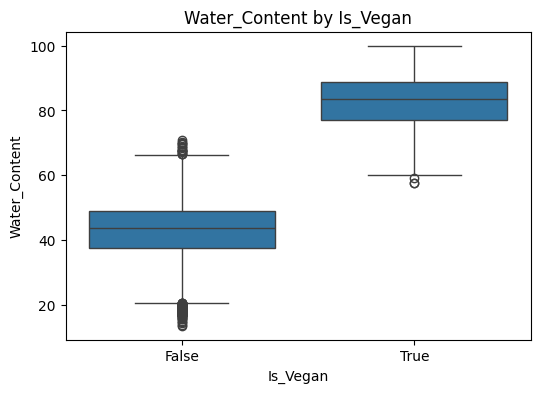

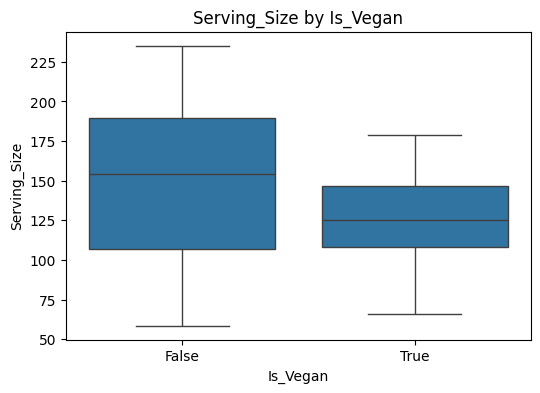

In [35]:
for nutrient in nutrients:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Is_Vegan", y=nutrient, data=Nutri_df)
    plt.title(f"{nutrient} by Is_Vegan")
    plt.show()

#Feature Selection

In [36]:
y = Nutri_df["Food_Name"]
X = Nutri_df.drop(columns=["Food_Name"])

In [37]:
y

,Food_Name
0,Pizza
1,Ice Cream
2,Burger
3,Sushi
4,Donut
...,...
31695,Banana
31696,Pizza
31697,Pizza
31698,Pasta


In [38]:
X

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False


In [39]:
num_features = [  "Calories", "Protein", "Fat", "Carbs", "Sugar", "Fiber",
    "Sodium", "Cholesterol", "Glycemic_Index",
    "Water_Content", "Serving_Size"]
cat_features = ["Meal_Type","Preparation_Method"]
bool_features = ["Is_Vegan", "Is_Gluten_Free"]

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24112, 15), (6029, 15), (24112,), (6029,))

In [41]:
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
num_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [42]:
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
cat_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [43]:
preprocessor = ColumnTransformer([
    ("num", num_pipe, num_features),
    ("cat", cat_pipe, cat_features),
    ("bool", "passthrough", bool_features)
])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Calories', 'Protein', 'Fat', 'Carbs',
                                  'Sugar', 'Fiber', 'Sodium', 'Cholesterol',
                                  'Glycemic_Index', 'Water_Content',
                                  'Serving_Size']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Meal_Type', 'Preparation_Method']),
                                ('bool', 'passthrough',
                                 ['Is_Vegan', 'Is_Gluten_Free'])])

In [46]:
Pre_Process_Pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor)
])
Pre_Process_Pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Calories', 'Protein', 'Fat',
                                                   'Carbs', 'Sugar', 'Fiber',
                                                   'Sodium', 'Cholesterol',
                                                   'Glycemic_Index',
                                                   'Water_Content',
                                                   'Serving_Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Meal_Type',
                                                   'Preparation_Method']),
                                                 ('bool', 'passthrough',
                                                  ['Is_Vegan',
                                                   'Is_Gluten_Free'])]))])

In [47]:
# Model Selection Logistic Regression

Model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('Classifier',LogisticRegression())
])
Model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Calories', 'Protein', 'Fat',
                                                   'Carbs', 'Sugar', 'Fiber',
                                                   'Sodium', 'Cholesterol',
                                                   'Glycemic_Index',
                                                   'Water_Content',
                                                   'Serving_Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Meal_Type',
                                                   'Preparation_Method']),
                                                 ('bool', 'passthrough',
                                                  ['Is_Vegan',
                                                   'Is_Gluten_Free'])])),
                ('Classifier', LogisticRegression())])

In [48]:
Model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Calories', 'Protein', 'Fat',
                                                   'Carbs', 'Sugar', 'Fiber',
                                                   'Sodium', 'Cholesterol',
                                                   'Glycemic_Index',
                                                   'Water_Content',
                                                   'Serving_Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Meal_Type',
                                                   'Preparation_Method']),
                                                 ('bool', 'passthrough',
                                                  ['Is_Vegan',
                                                   'Is_Gluten_Free'])])),
                ('Classifier', LogisticRegression())])

In [60]:
# Predict For X_Train and X_Test

y_pred_train=Model.predict(X_train)
y_pred_test=Model.predict(X_test)

In [61]:
y_pred_train

array(['Donut', 'Donut', 'Apple', ..., 'Pizza', 'Burger', 'Burger'],
      dtype=object)

In [62]:
y_pred_test

array(['Ice Cream', 'Salad', 'Pasta', ..., 'Ice Cream', 'Salad', 'Sushi'],
      dtype=object)

In [52]:
# Evaluate the Model For Both Train And Test
print('Classification Report For Train')
print(classification_report(y_train,y_pred_train))
print('Classification Report For Test')
print(classification_report(y_test,y_pred_test))

Classification Report For Train
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00      1182
      Banana       0.99      1.00      1.00       937
      Burger       0.99      0.99      0.99      3925
       Donut       1.00      1.00      1.00      3527
   Ice Cream       1.00      1.00      1.00      2348
       Pasta       1.00      1.00      1.00      3160
       Pizza       1.00      1.00      1.00      4708
       Salad       1.00      1.00      1.00       780
       Steak       1.00      1.00      1.00       762
       Sushi       1.00      1.00      1.00      2783

    accuracy                           1.00     24112
   macro avg       1.00      1.00      1.00     24112
weighted avg       1.00      1.00      1.00     24112

Classification Report For Test
              precision    recall  f1-score   support

       Apple       0.99      1.00      0.99       273
      Banana       1.00      0.99      0.99       242
      Burger   

In [53]:
# Decision Tree Model
Model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("DT_classifier",DecisionTreeClassifier())
])

Model.fit(X_train,y_train)

y_pred_train=Model.predict(X_train)
y_pred_test=Model.predict(X_test)

# Evaluate the Model For Both Train And Test
print('Classification Report For Train')
print(classification_report(y_train,y_pred_train))
print('Classification Report For Test')
print(classification_report(y_test,y_pred_test))


Classification Report For Train
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00      1182
      Banana       1.00      1.00      1.00       937
      Burger       1.00      1.00      1.00      3925
       Donut       1.00      1.00      1.00      3527
   Ice Cream       1.00      1.00      1.00      2348
       Pasta       1.00      1.00      1.00      3160
       Pizza       1.00      1.00      1.00      4708
       Salad       1.00      1.00      1.00       780
       Steak       1.00      1.00      1.00       762
       Sushi       1.00      1.00      1.00      2783

    accuracy                           1.00     24112
   macro avg       1.00      1.00      1.00     24112
weighted avg       1.00      1.00      1.00     24112

Classification Report For Test
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       273
      Banana       0.98      0.99      0.99       242
      Burger   

In [54]:
#Support Vector Machine

Model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('SVC_Classifier',SVC())
])

Model.fit(X_train,y_train)

y_pred_train = Model.predict(X_train)
y_pred_test = Model.predict(X_test)

# Evaluate the Model For Both Train And Test
print('Classification Report For Train')
print(classification_report(y_train,y_pred_train))
print('Classification Report For Test')
print(classification_report(y_test,y_pred_test))

Classification Report For Train
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00      1182
      Banana       1.00      1.00      1.00       937
      Burger       1.00      1.00      1.00      3925
       Donut       1.00      1.00      1.00      3527
   Ice Cream       1.00      1.00      1.00      2348
       Pasta       1.00      1.00      1.00      3160
       Pizza       1.00      1.00      1.00      4708
       Salad       1.00      1.00      1.00       780
       Steak       1.00      1.00      1.00       762
       Sushi       1.00      1.00      1.00      2783

    accuracy                           1.00     24112
   macro avg       1.00      1.00      1.00     24112
weighted avg       1.00      1.00      1.00     24112

Classification Report For Test
              precision    recall  f1-score   support

       Apple       0.99      1.00      0.99       273
      Banana       1.00      0.99      0.99       242
      Burger   

In [55]:
#RandomForest
Model=Pipeline(steps=[
    ('preprocessor',preprocessor),
     ('RF_Classifier',RandomForestClassifier(n_estimators=10,max_depth=10))
])
# Fit the Model
Model.fit(X_train,y_train)


# Predict For X_Train and X_Test

y_pred_train=Model.predict(X_train)
y_pred_test=Model.predict(X_test)

# Evaluate the Model For Both Train And Test
print('Classification Report For Train')
print(classification_report(y_train,y_pred_train))
print('Classification Report For Test')
print(classification_report(y_test,y_pred_test))

Classification Report For Train
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00      1182
      Banana       1.00      1.00      1.00       937
      Burger       1.00      0.99      1.00      3925
       Donut       1.00      1.00      1.00      3527
   Ice Cream       1.00      1.00      1.00      2348
       Pasta       1.00      1.00      1.00      3160
       Pizza       1.00      1.00      1.00      4708
       Salad       1.00      1.00      1.00       780
       Steak       1.00      1.00      1.00       762
       Sushi       1.00      1.00      1.00      2783

    accuracy                           1.00     24112
   macro avg       1.00      1.00      1.00     24112
weighted avg       1.00      1.00      1.00     24112

Classification Report For Test
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       273
      Banana       1.00      1.00      1.00       242
      Burger   

In [56]:
#Gradient Boosting Classifier
Model=Pipeline(steps=[
    ('preprocessor',preprocessor),
     ('GradientBoost_classifier',GradientBoostingClassifier())
])
# Fit the Model
Model.fit(X_train,y_train)


# Predict For X_Train and X_Test

y_pred_train=Model.predict(X_train)
y_pred_test=Model.predict(X_test)

# Evaluate the Model For Both Train And Test
print('Classification Report For Train')
print(classification_report(y_train,y_pred_train))
print('Classification Report For Test')
print(classification_report(y_test,y_pred_test))

Classification Report For Train
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00      1182
      Banana       1.00      1.00      1.00       937
      Burger       1.00      1.00      1.00      3925
       Donut       1.00      1.00      1.00      3527
   Ice Cream       1.00      1.00      1.00      2348
       Pasta       1.00      1.00      1.00      3160
       Pizza       1.00      1.00      1.00      4708
       Salad       1.00      1.00      1.00       780
       Steak       1.00      1.00      1.00       762
       Sushi       1.00      1.00      1.00      2783

    accuracy                           1.00     24112
   macro avg       1.00      1.00      1.00     24112
weighted avg       1.00      1.00      1.00     24112

Classification Report For Test
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       273
      Banana       1.00      1.00      1.00       242
      Burger   

In [57]:
#KNN
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('KNN_Classifier', KNeighborsClassifier(
        n_neighbors=7,

    ))
])
knn_model.fit(X_train, y_train)
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

print('KNN - Classification Report For Train')
print(classification_report(y_train, y_pred_train_knn))

print('KNN - Classification Report For Test')
print(classification_report(y_test, y_pred_test_knn))

KNN - Classification Report For Train
              precision    recall  f1-score   support

       Apple       1.00      0.99      1.00      1182
      Banana       0.99      1.00      1.00       937
      Burger       1.00      0.98      0.99      3925
       Donut       1.00      1.00      1.00      3527
   Ice Cream       1.00      1.00      1.00      2348
       Pasta       1.00      1.00      1.00      3160
       Pizza       0.99      1.00      0.99      4708
       Salad       1.00      1.00      1.00       780
       Steak       1.00      1.00      1.00       762
       Sushi       1.00      1.00      1.00      2783

    accuracy                           1.00     24112
   macro avg       1.00      1.00      1.00     24112
weighted avg       1.00      1.00      1.00     24112

KNN - Classification Report For Test
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       273
      Banana       0.98      0.99      0.99       242
   

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(Nutri_df["Food_Name"])

In [65]:
X = Nutri_df.drop("Food_Name", axis=1)

X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [75]:
xgb_model.fit(X_train, y_train_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Calories', 'Protein', 'Fat',
                                                   'Carbs', 'Sugar', 'Fiber',
                                                   'Sodium', 'Cholesterol',
                                                   'Glycemic_Index',
                                                   'Water_Content',
                                                   'Serving_Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None, num_class=10, ...))])

In [76]:
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)
print(y_pred_train_xgb[:5])

[3 5 9 5 3]


In [83]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('XGBoost_Classifier', XGBClassifier(
        num_class=len(set(y_train_enc)),
        n_estimators=300,
        max_depth=6,
        random_state=42
    ))
])
xgb_model.fit(X_train, y_train_enc)
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)
print("XGBoost - Train Report")
print(classification_report(y_train_enc, y_pred_train_xgb))

print("XGBoost - Test Report")
print(classification_report(y_test_enc, y_pred_test_xgb))


XGBoost - Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1164
           1       1.00      1.00      1.00       943
           2       1.00      1.00      1.00      3929
           3       1.00      1.00      1.00      3555
           4       1.00      1.00      1.00      2349
           5       1.00      1.00      1.00      3161
           6       1.00      1.00      1.00      4709
           7       1.00      1.00      1.00       783
           8       1.00      1.00      1.00       766
           9       1.00      1.00      1.00      2753

    accuracy                           1.00     24112
   macro avg       1.00      1.00      1.00     24112
weighted avg       1.00      1.00      1.00     24112

XGBoost - Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       236
           2       0.99      1.00